In [ ]:
!pip install image-similarity-measures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
     |████████████████████████████████| 19.3 MB 59.3 MB/s 
  Created wheel for phasepack: filename=phasepack-1.5-py3-none-any.whl size=26984 sha256=0e051f74e5549268cb6165101c39f3e24c6ac21624c8ad74da85615a1aaa5098
  Stored in directory: /root/.cache/pip/wheels/39/5c/b3/79292d7ac3f088e858805b5515b45cf5a365106397d936caf1
Successfully built phasepack


In [ ]:
import tensorflow as tf # Imports tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D,LSTM,Bidirectional,Attention,concatenate,MultiHeadAttention
from tensorflow.keras.layers import DepthwiseConv2D,Add, ReLU, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Activation,ActivityRegularization, AvgPool2D, LeakyReLU, Conv2DTranspose
from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.metrics import CategoricalAccuracy, BinaryAccuracy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy as np
import pandas as pd 
import matplotlib
import seaborn as sns
import sklearn
#import imblearn
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from glob import glob

from tensorflow.keras import backend as K

import skimage.io
import skimage.color
import skimage.filters

In [ ]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/
%ls

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [ ]:
img_shape = (160, 160, 3)
gr_shape = (160, 160, 1)
images=[]
mask_img=[]
y=[]
img_dir= 'image'
mask_dir='mask'
rel_dirname = "/content/drive/MyDrive/Brain Tumour Classification & Segmentation /datasets/3-merge-masked-dataset/"
Name = "unet performance"


In [ ]:
for dirname in os.listdir(os.path.join(rel_dirname, img_dir)):
  cnt=0
  for filename in glob(rel_dirname+ img_dir+'/'+dirname+'/*.jpg'):
      #print(filename)
      mfilename=filename.replace('image','mask')
      mfilename=mfilename.replace('.jpg','_m.jpg')
      #print(mfilename)
      img = image.load_img(os.path.join(rel_dirname, filename),target_size=img_shape)
      img = image.img_to_array(img)
      img = img/255.0
      images.append(img)
      mimg = image.load_img(os.path.join(rel_dirname, mfilename),target_size=img_shape)
      mimg = image.img_to_array(mimg)
      mimg = mimg/255.0
      mask_img.append(mimg)
      y.append(dirname)
      cnt=cnt+1
      if cnt > 400:
        break


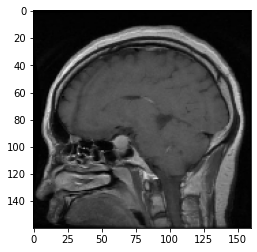

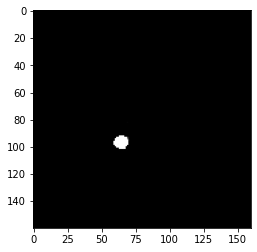

In [ ]:
raw_img= np.array(images)
images=[]
mask_img = np.array(mask_img)
plt.imshow(raw_img[20])
plt.show()
plt.imshow(mask_img[20])
plt.show()

In [ ]:
model= tf.keras.models.load_model("/content/drive/MyDrive/Brain Tumour Classification & Segmentation /datasets/3-merge-masked-dataset/unet-segment.h5")

In [ ]:
y_pred=model.predict(raw_img)

In [ ]:
tumimg=y_pred*raw_img

In [ ]:
tumimg=rgb2gray(tumimg)

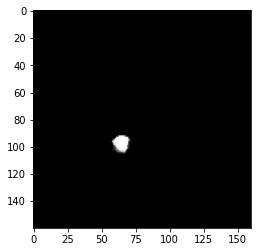

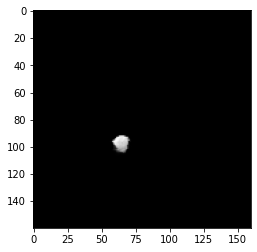

In [ ]:
plt.imshow(y_pred[20])
plt.show()
plt.imshow(tumimg[20],cmap='gray')
plt.show()

In [ ]:
modelclas= tf.keras.models.load_model("/content/drive/MyDrive/Brain Tumour Classification & Segmentation /datasets/seq-nopre-maskdata.h5")

In [ ]:
class_pred=modelclas.predict(tumimg)

In [ ]:
class_pred.shape

(604, 4)

Actual MRI Image


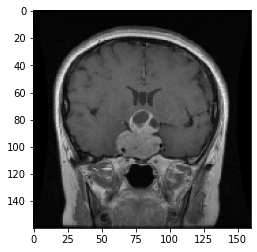

Actual Mask Image


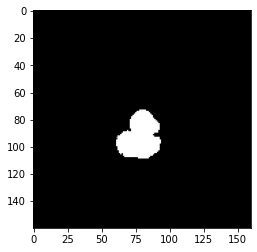

Predicted Mask Image


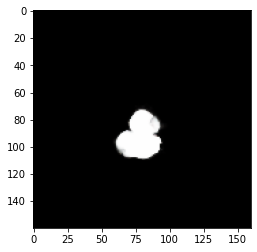

Predicted Mask Tumor


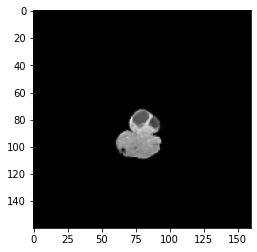

Predicted class = [5.5572576e-07 1.6625809e-02 1.0396563e-01 8.7940800e-01]
True class = 3
Actual MRI Image


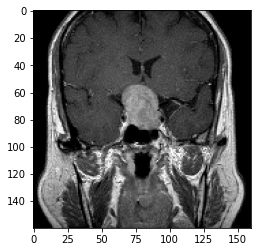

Actual Mask Image


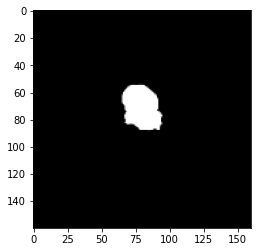

Predicted Mask Image


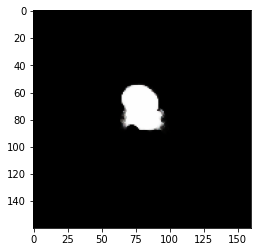

Predicted Mask Tumor


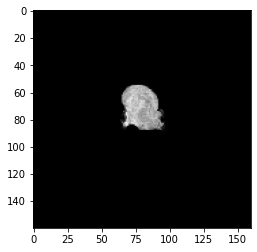

Predicted class = [4.9734872e-11 1.3023912e-02 8.4396648e-01 1.4300969e-01]
True class = 3
Actual MRI Image


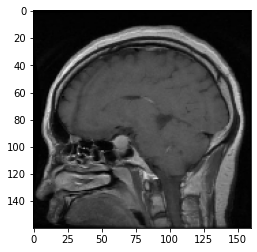

Actual Mask Image


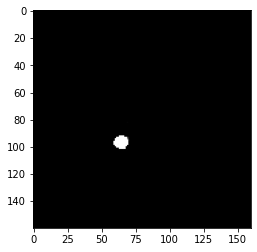

Predicted Mask Image


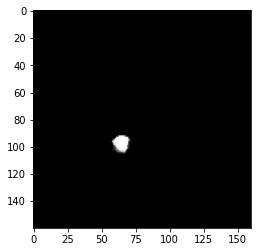

Predicted Mask Tumor


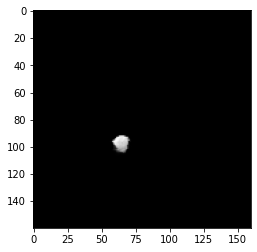

Predicted class = [3.5184863e-26 1.1656447e-06 2.2494201e-04 9.9977392e-01]
True class = 3
Actual MRI Image


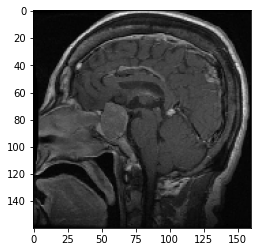

Actual Mask Image


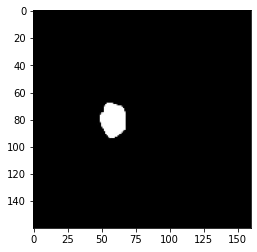

Predicted Mask Image


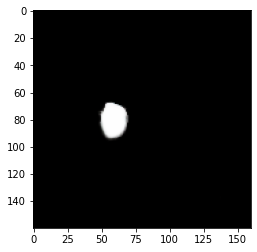

Predicted Mask Tumor


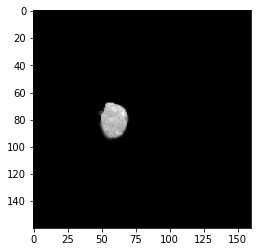

Predicted class = [1.4224575e-15 1.1423152e-02 2.9197354e-03 9.8565710e-01]
True class = 3
Actual MRI Image


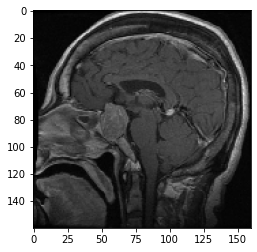

Actual Mask Image


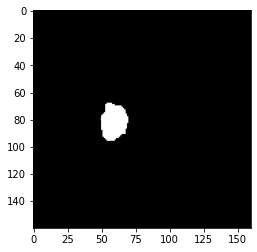

Predicted Mask Image


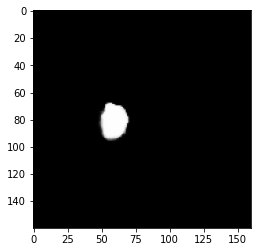

Predicted Mask Tumor


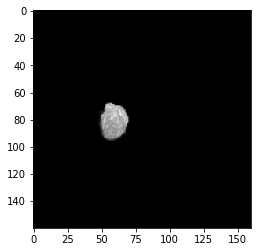

Predicted class = [1.4822306e-12 3.2825750e-01 1.7293334e-03 6.7001319e-01]
True class = 3
Actual MRI Image


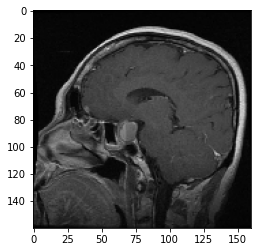

Actual Mask Image


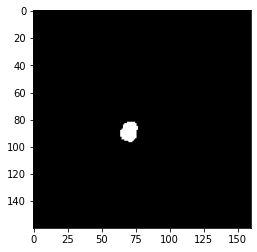

Predicted Mask Image


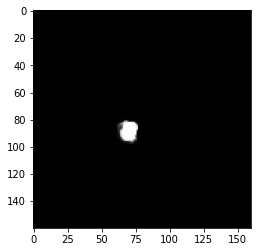

Predicted Mask Tumor


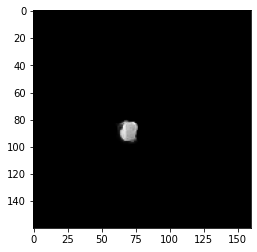

Predicted class = [1.5386778e-12 3.0083728e-03 1.8336095e-02 9.7865558e-01]
True class = 3
Actual MRI Image


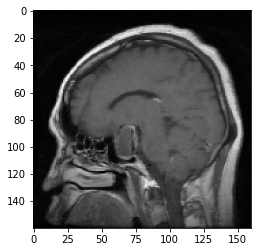

Actual Mask Image


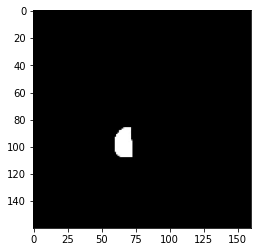

Predicted Mask Image


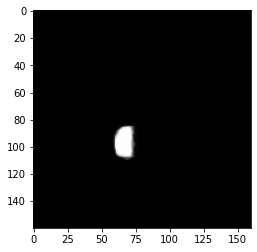

Predicted Mask Tumor


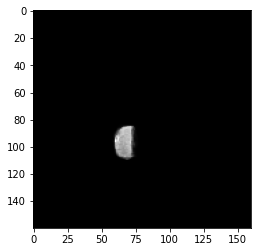

Predicted class = [1.5406760e-09 3.7105825e-02 1.1832941e-02 9.5106119e-01]
True class = 3
Actual MRI Image


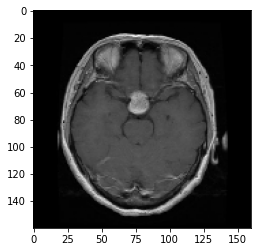

Actual Mask Image


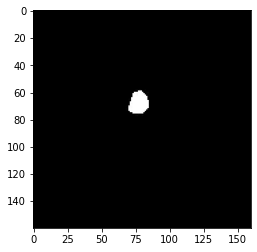

Predicted Mask Image


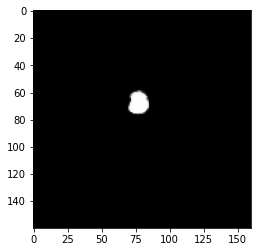

Predicted Mask Tumor


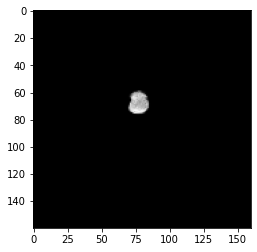

Predicted class = [4.6857375e-12 2.2979574e-03 9.6873417e-02 9.0082860e-01]
True class = 3
Actual MRI Image


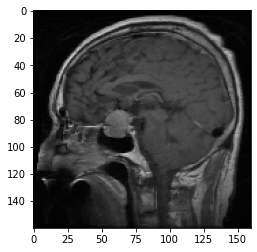

Actual Mask Image


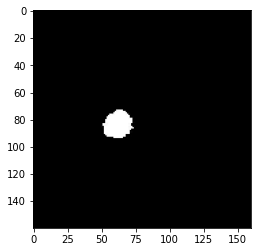

Predicted Mask Image


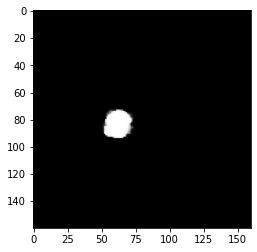

Predicted Mask Tumor


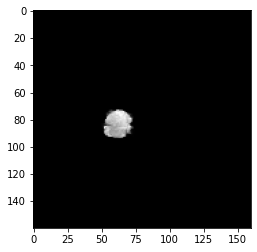

Predicted class = [6.8960218e-15 1.6948563e-03 1.3483502e-02 9.8482162e-01]
True class = 3
Actual MRI Image


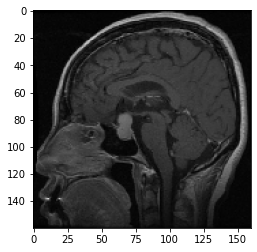

Actual Mask Image


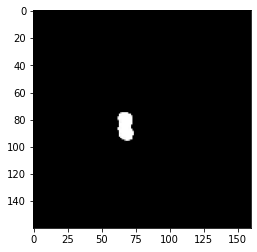

Predicted Mask Image


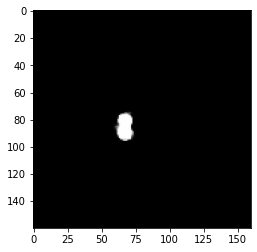

Predicted Mask Tumor


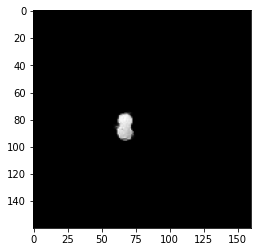

Predicted class = [0.0000000e+00 1.0989445e-08 4.7053857e-07 9.9999952e-01]
True class = 3
Actual MRI Image


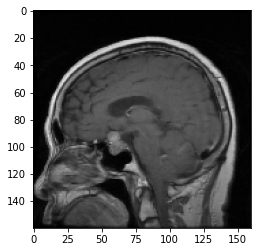

Actual Mask Image


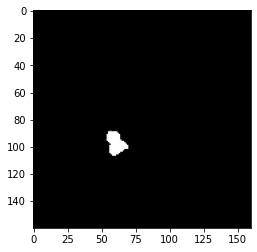

Predicted Mask Image


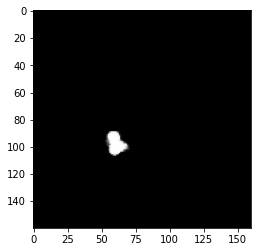

Predicted Mask Tumor


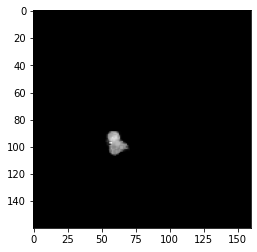

Predicted class = [4.6180620e-07 1.7310916e-02 2.7642050e-01 7.0626813e-01]
True class = 3
Actual MRI Image


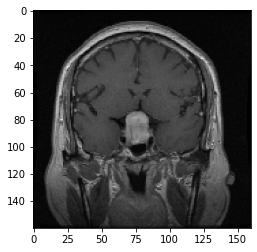

Actual Mask Image


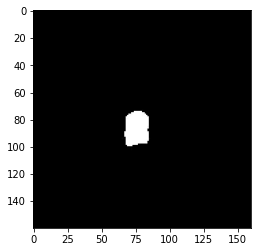

Predicted Mask Image


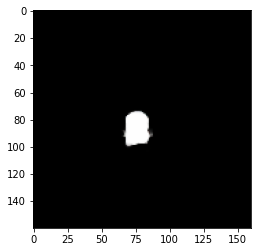

Predicted Mask Tumor


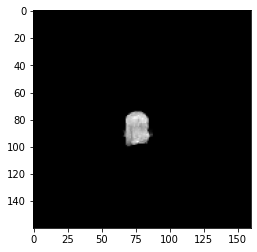

Predicted class = [9.7691277e-10 2.4779595e-04 2.9748881e-01 7.0226341e-01]
True class = 3
Actual MRI Image


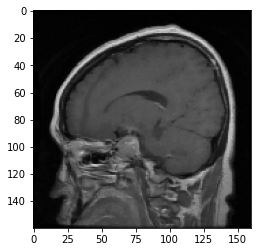

Actual Mask Image


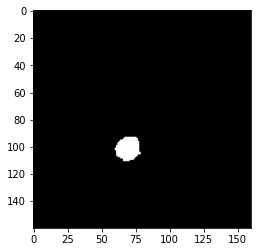

Predicted Mask Image


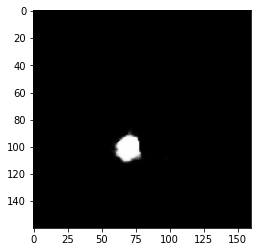

Predicted Mask Tumor


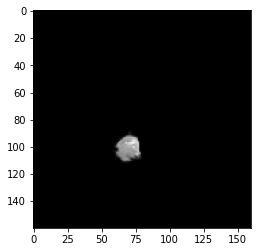

Predicted class = [2.9183531e-11 1.3184967e-02 9.8353839e-01 3.2766075e-03]
True class = 3
Actual MRI Image


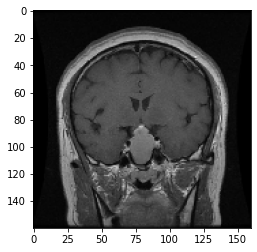

Actual Mask Image


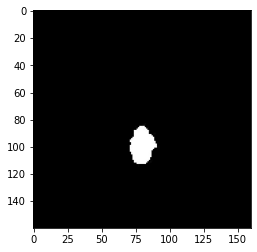

Predicted Mask Image


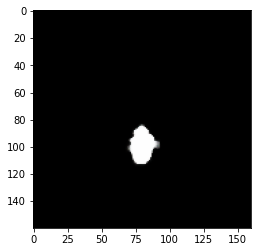

Predicted Mask Tumor


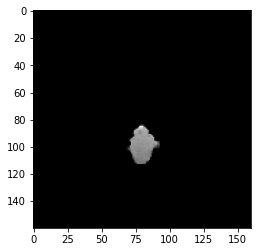

Predicted class = [9.3353591e-13 1.2080550e-05 7.1035820e-01 2.8962967e-01]
True class = 3
Actual MRI Image


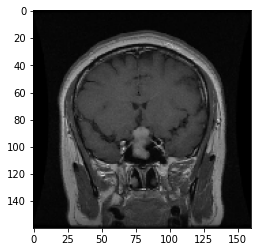

Actual Mask Image


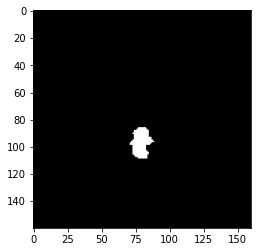

Predicted Mask Image


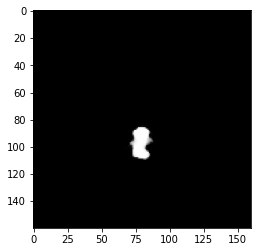

Predicted Mask Tumor


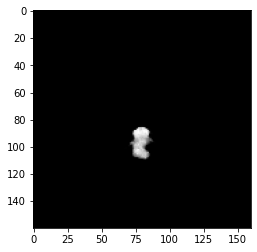

Predicted class = [3.8738994e-25 6.2369656e-07 4.1170808e-04 9.9958771e-01]
True class = 3
Actual MRI Image


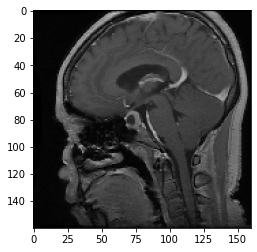

Actual Mask Image


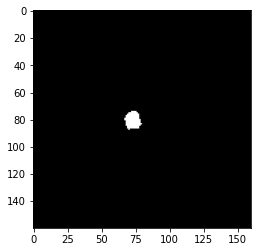

Predicted Mask Image


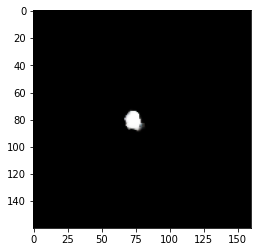

Predicted Mask Tumor


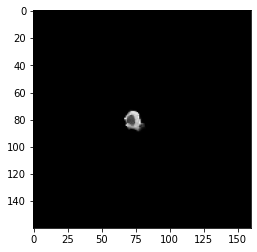

Predicted class = [1.1357958e-21 1.7804824e-02 1.9854760e-04 9.8199666e-01]
True class = 3
Actual MRI Image


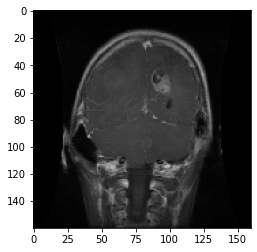

Actual Mask Image


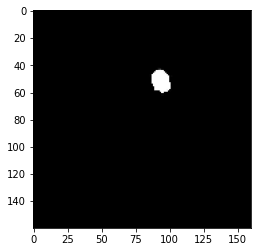

Predicted Mask Image


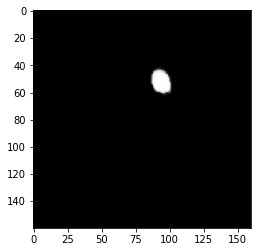

Predicted Mask Tumor


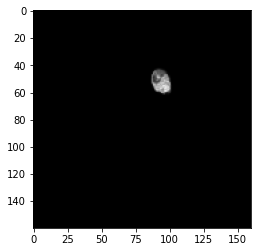

Predicted class = [6.8553083e-27 9.9999952e-01 4.5466848e-07 1.4077081e-10]
True class = 1
Actual MRI Image


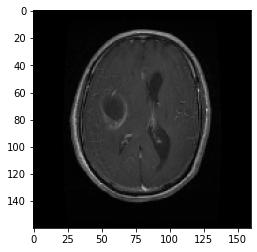

Actual Mask Image


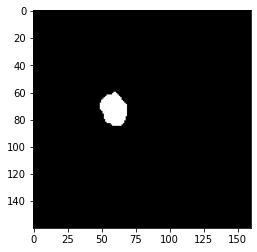

Predicted Mask Image


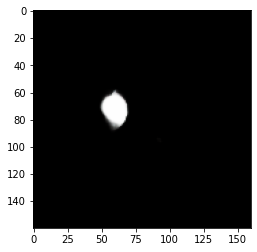

Predicted Mask Tumor


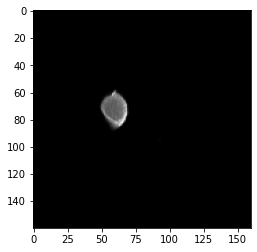

Predicted class = [0.0000000e+00 1.0000000e+00 2.4582987e-11 2.8016288e-15]
True class = 1
Actual MRI Image


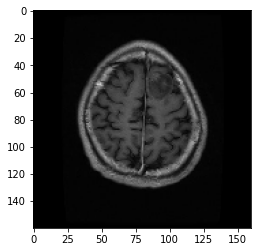

Actual Mask Image


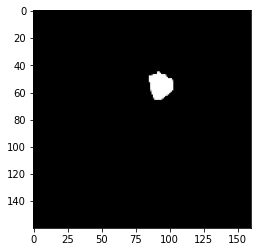

Predicted Mask Image


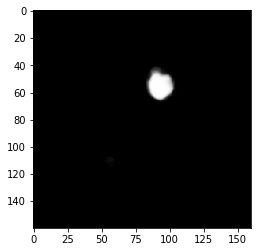

Predicted Mask Tumor


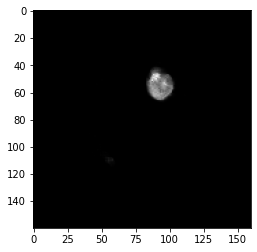

Predicted class = [0.0000000e+00 1.0000000e+00 7.0505727e-13 1.2542319e-17]
True class = 1
Actual MRI Image


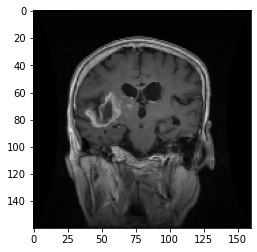

Actual Mask Image


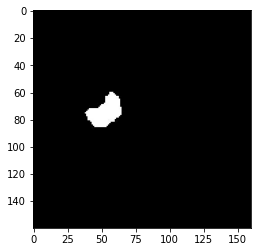

Predicted Mask Image


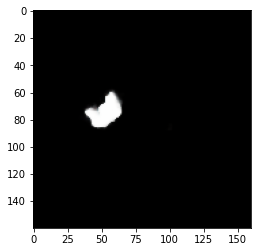

Predicted Mask Tumor


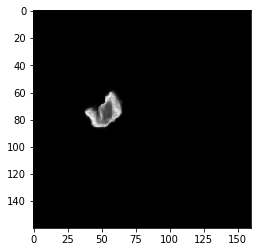

Predicted class = [0.0000000e+00 1.0000000e+00 3.5220470e-12 1.9384523e-19]
True class = 1
Actual MRI Image


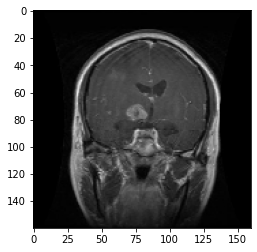

Actual Mask Image


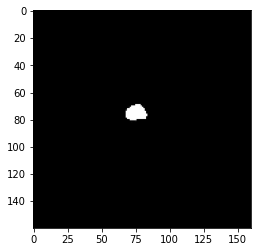

Predicted Mask Image


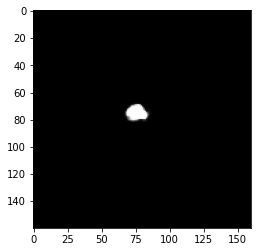

Predicted Mask Tumor


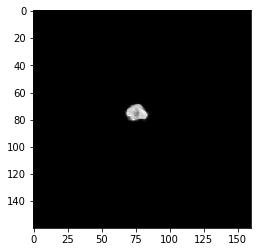

Predicted class = [4.912437e-21 9.999802e-01 1.969797e-05 7.033836e-08]
True class = 1
Actual MRI Image


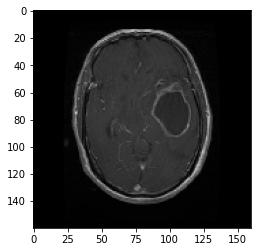

Actual Mask Image


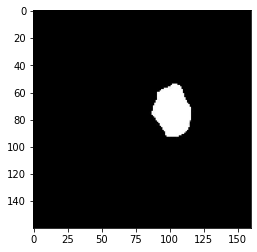

Predicted Mask Image


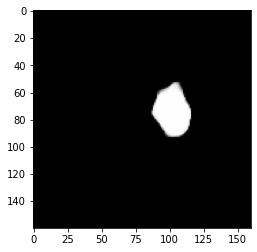

Predicted Mask Tumor


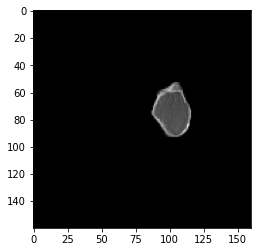

Predicted class = [0.0000000e+00 1.0000000e+00 3.0726137e-14 1.1795628e-19]
True class = 1
Actual MRI Image


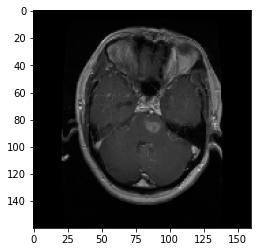

Actual Mask Image


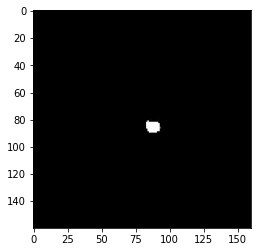

Predicted Mask Image


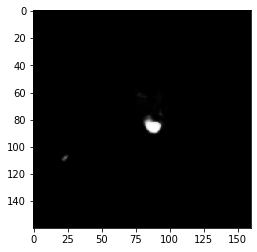

Predicted Mask Tumor


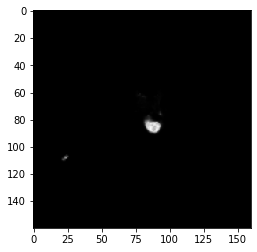

Predicted class = [8.4854246e-23 9.9999869e-01 1.1389745e-06 2.2247622e-07]
True class = 1
Actual MRI Image


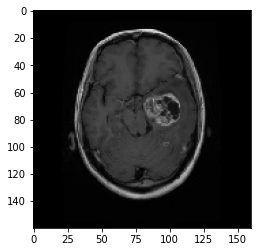

Actual Mask Image


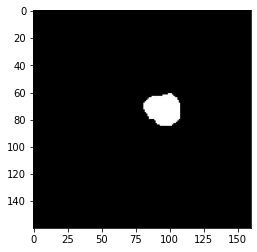

Predicted Mask Image


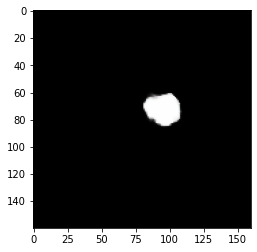

Predicted Mask Tumor


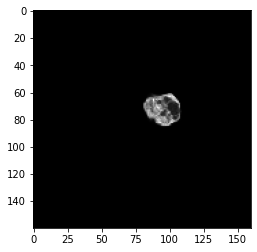

Predicted class = [0.000000e+00 1.000000e+00 8.147915e-17 2.538197e-22]
True class = 1
Actual MRI Image


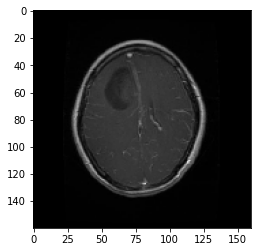

Actual Mask Image


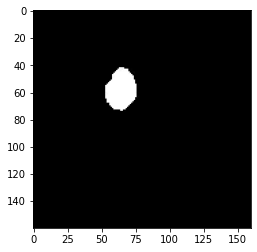

Predicted Mask Image


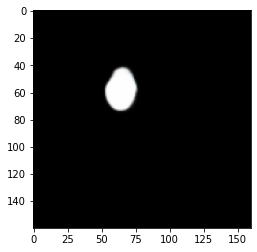

Predicted Mask Tumor


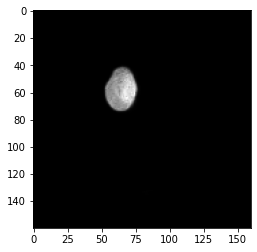

Predicted class = [0.000000e+00 1.000000e+00 2.275167e-12 4.869369e-18]
True class = 1
Actual MRI Image


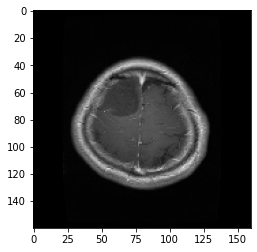

Actual Mask Image


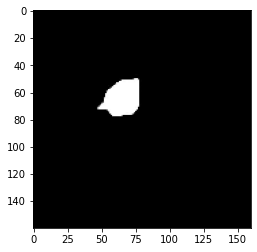

Predicted Mask Image


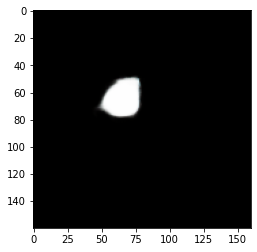

Predicted Mask Tumor


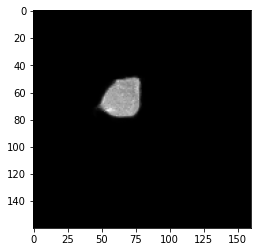

Predicted class = [0.0000000e+00 1.0000000e+00 1.2171401e-09 4.6988488e-15]
True class = 1
Actual MRI Image


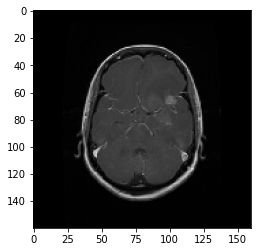

Actual Mask Image


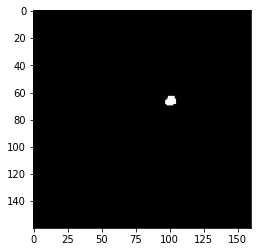

Predicted Mask Image


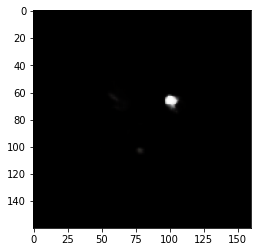

Predicted Mask Tumor


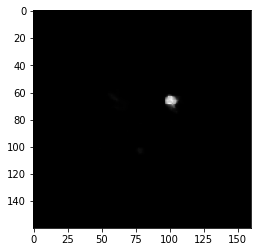

Predicted class = [1.0155078e-37 1.0000000e+00 1.5824518e-10 3.5158417e-14]
True class = 1
Actual MRI Image


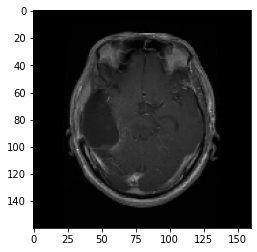

Actual Mask Image


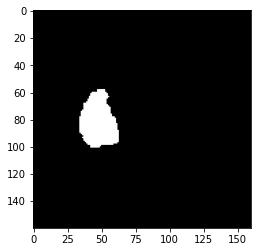

Predicted Mask Image


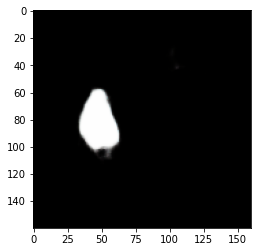

Predicted Mask Tumor


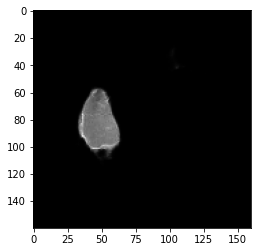

Predicted class = [0.0000000e+00 1.0000000e+00 5.4223561e-12 2.1619813e-18]
True class = 1
Actual MRI Image


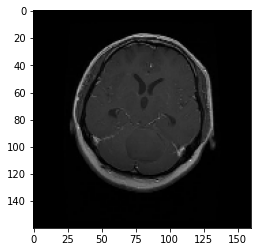

Actual Mask Image


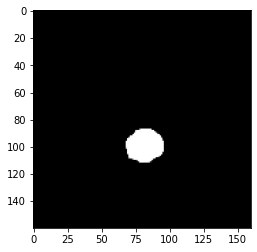

Predicted Mask Image


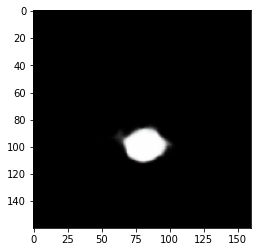

Predicted Mask Tumor


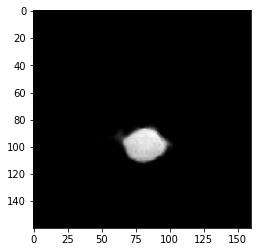

Predicted class = [1.0587856e-35 1.0000000e+00 4.3365969e-09 6.8120301e-14]
True class = 1
Actual MRI Image


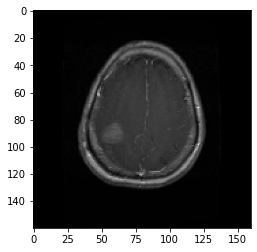

Actual Mask Image


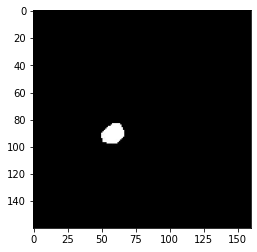

Predicted Mask Image


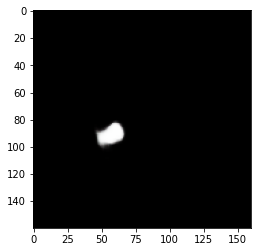

Predicted Mask Tumor


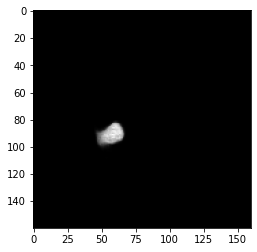

Predicted class = [1.6186470e-17 9.9995172e-01 4.8055776e-05 1.6225468e-07]
True class = 1
Actual MRI Image


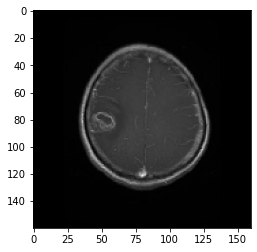

Actual Mask Image


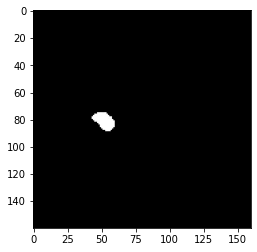

Predicted Mask Image


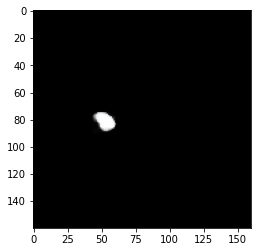

Predicted Mask Tumor


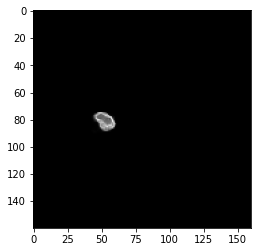

Predicted class = [0.0000000e+00 1.0000000e+00 1.2141083e-11 1.9152013e-14]
True class = 1
Actual MRI Image


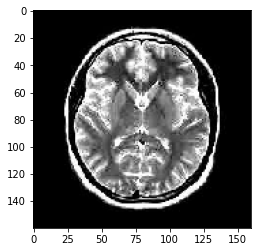

Actual Mask Image


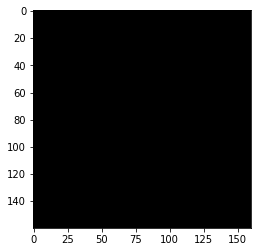

Predicted Mask Image


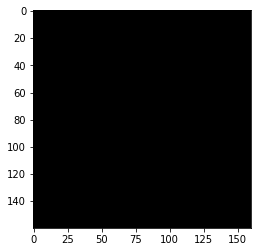

Predicted Mask Tumor


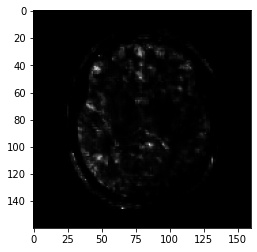

Predicted class = [9.9955386e-01 4.3434912e-04 1.1507750e-05 2.7859977e-07]
True class = 0
Actual MRI Image


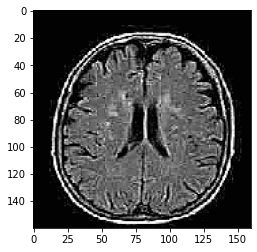

Actual Mask Image


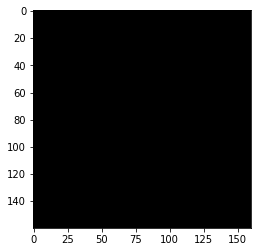

Predicted Mask Image


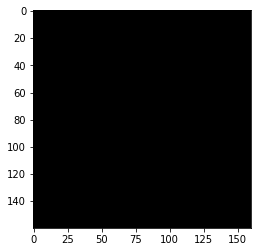

Predicted Mask Tumor


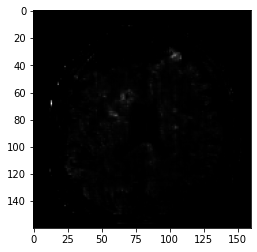

Predicted class = [9.9956363e-01 4.2483819e-04 1.1233964e-05 2.7248473e-07]
True class = 0
Actual MRI Image


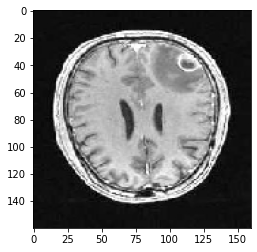

Actual Mask Image


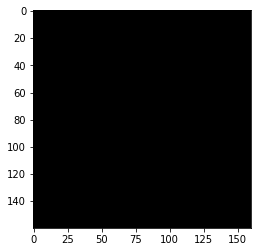

Predicted Mask Image


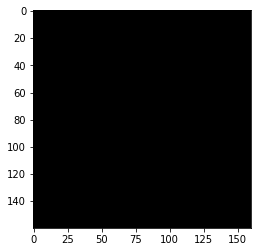

Predicted Mask Tumor


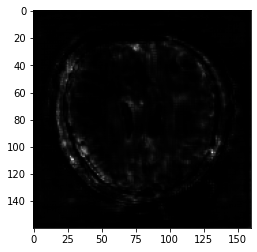

Predicted class = [9.9955434e-01 4.3396716e-04 1.1414564e-05 2.7560242e-07]
True class = 0
Actual MRI Image


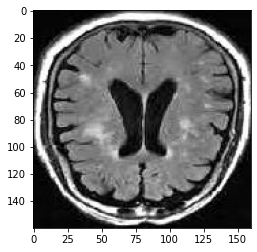

Actual Mask Image


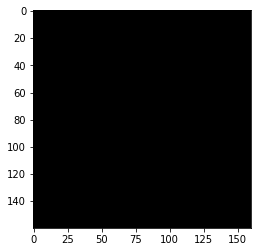

Predicted Mask Image


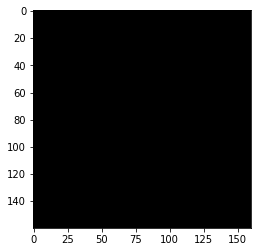

Predicted Mask Tumor


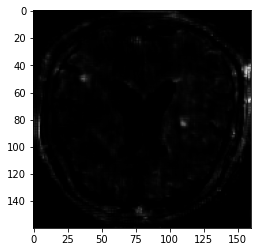

Predicted class = [9.9957162e-01 4.1702250e-04 1.1052757e-05 2.6804986e-07]
True class = 0
Actual MRI Image


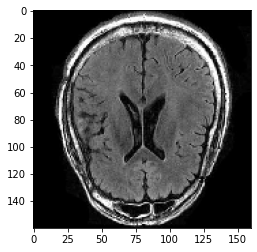

Actual Mask Image


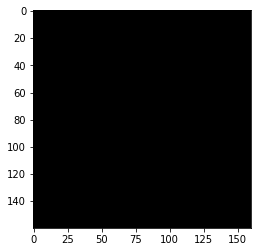

Predicted Mask Image


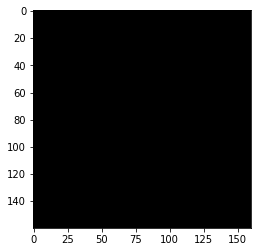

Predicted Mask Tumor


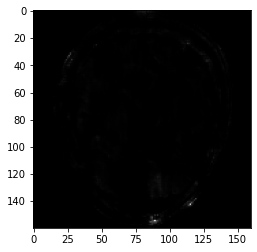

Predicted class = [9.9956387e-01 4.2454666e-04 1.1237352e-05 2.7196921e-07]
True class = 0
Actual MRI Image


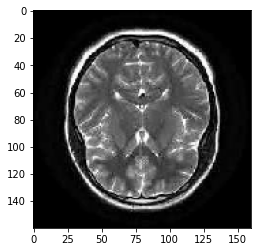

Actual Mask Image


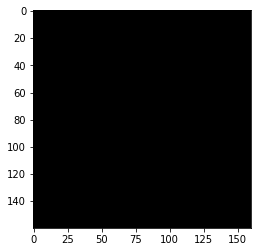

Predicted Mask Image


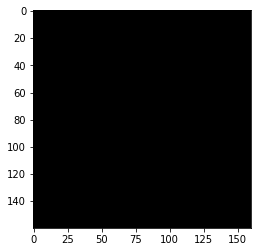

Predicted Mask Tumor


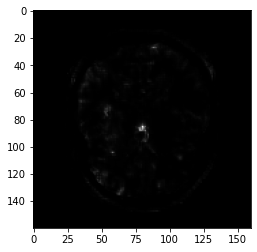

Predicted class = [9.99552786e-01 4.35398339e-04 1.15336115e-05 2.79330550e-07]
True class = 0
Actual MRI Image


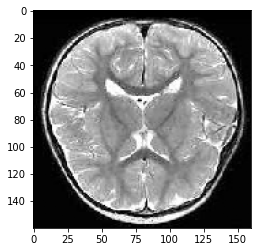

Actual Mask Image


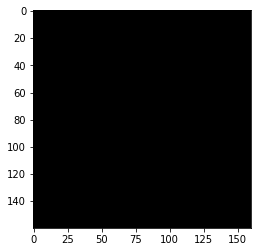

Predicted Mask Image


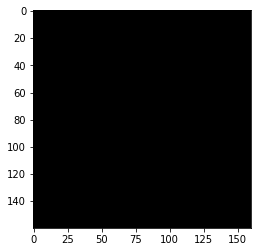

Predicted Mask Tumor


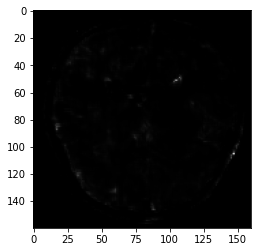

Predicted class = [9.9954528e-01 4.4262561e-04 1.1697345e-05 2.8280931e-07]
True class = 0
Actual MRI Image


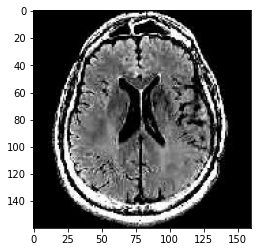

Actual Mask Image


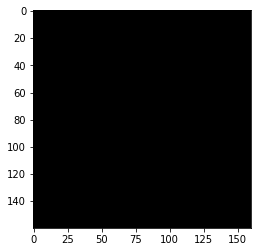

Predicted Mask Image


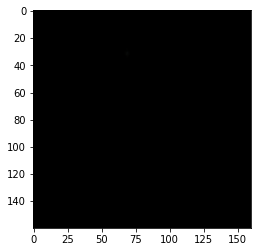

Predicted Mask Tumor


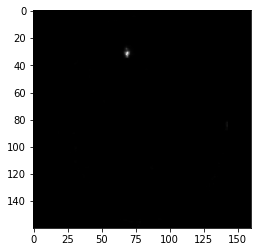

Predicted class = [9.9961865e-01 3.7066400e-04 1.0327528e-05 2.6004810e-07]
True class = 0
Actual MRI Image


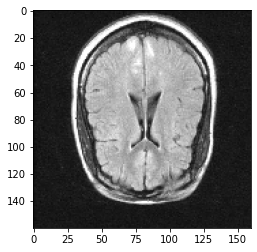

Actual Mask Image


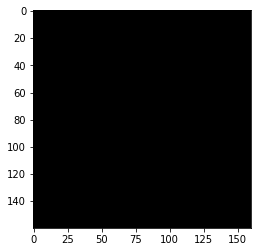

Predicted Mask Image


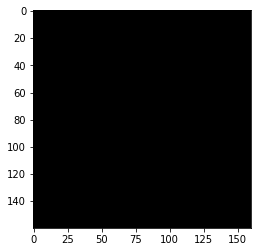

Predicted Mask Tumor


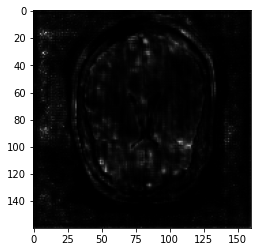

Predicted class = [9.99553621e-01 4.34578164e-04 1.14662935e-05 2.77164162e-07]
True class = 0
Actual MRI Image


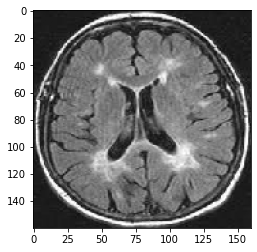

Actual Mask Image


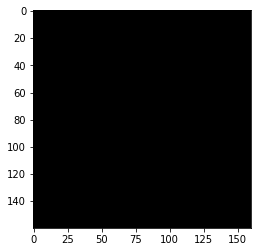

Predicted Mask Image


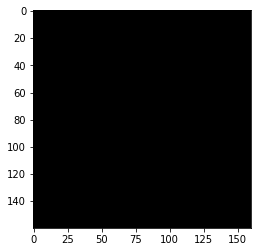

Predicted Mask Tumor


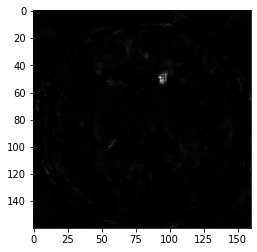

Predicted class = [9.9956602e-01 4.2242851e-04 1.1243090e-05 2.7311185e-07]
True class = 0
Actual MRI Image


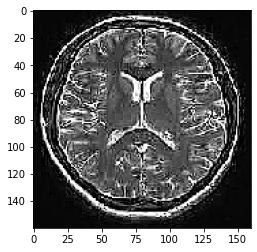

Actual Mask Image


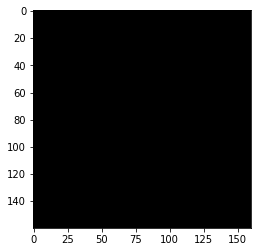

Predicted Mask Image


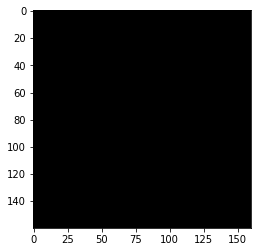

Predicted Mask Tumor


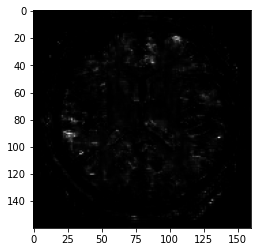

Predicted class = [9.9957234e-01 4.1631371e-04 1.1033029e-05 2.6740386e-07]
True class = 0
Actual MRI Image


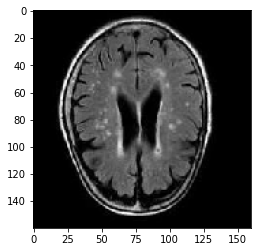

Actual Mask Image


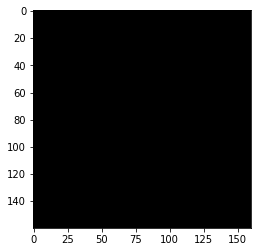

Predicted Mask Image


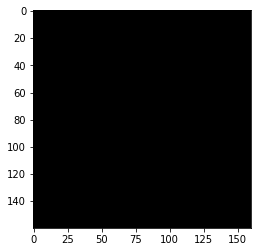

Predicted Mask Tumor


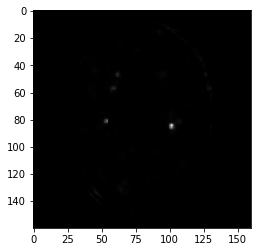

Predicted class = [9.9955887e-01 4.2946005e-04 1.1361628e-05 2.7614641e-07]
True class = 0
Actual MRI Image


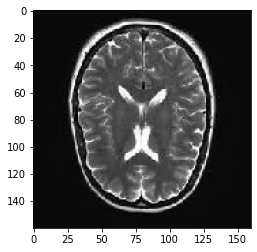

Actual Mask Image


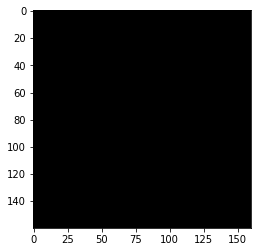

Predicted Mask Image


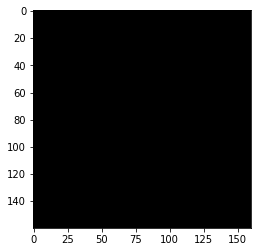

Predicted Mask Tumor


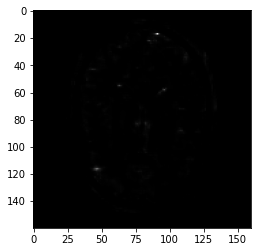

Predicted class = [9.9956864e-01 4.1986755e-04 1.1140751e-05 2.7031507e-07]
True class = 0
Actual MRI Image


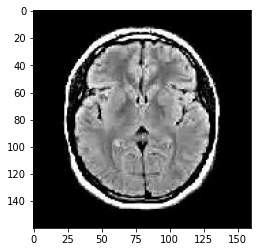

Actual Mask Image


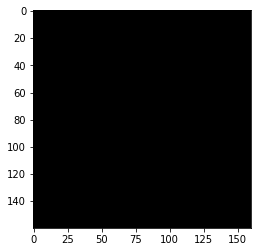

Predicted Mask Image


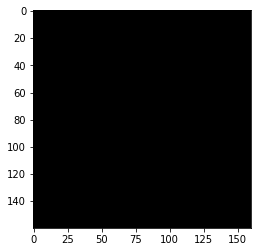

Predicted Mask Tumor


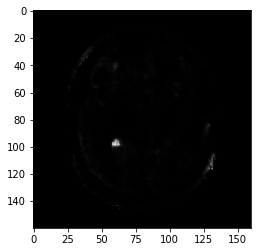

Predicted class = [9.9953985e-01 4.4804212e-04 1.1862975e-05 2.8743889e-07]
True class = 0
Actual MRI Image


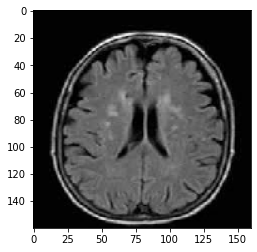

Actual Mask Image


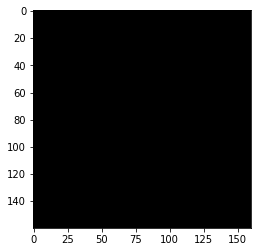

Predicted Mask Image


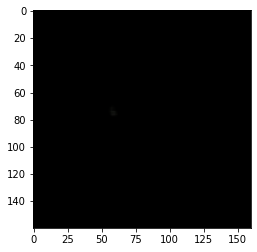

Predicted Mask Tumor


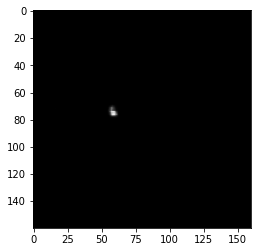

Predicted class = [8.6402440e-01 1.3413808e-01 1.7979449e-03 3.9616432e-05]
True class = 0
Actual MRI Image


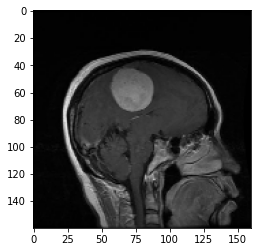

Actual Mask Image


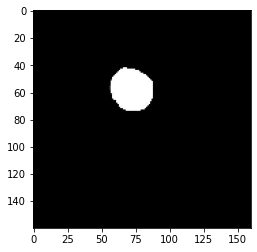

Predicted Mask Image


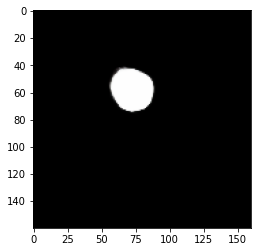

Predicted Mask Tumor


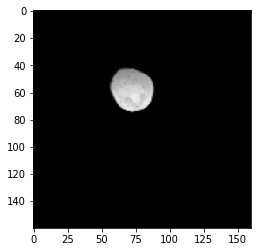

Predicted class = [0.0000000e+00 4.9232064e-22 1.0000000e+00 4.0393246e-20]
True class = 2
Actual MRI Image


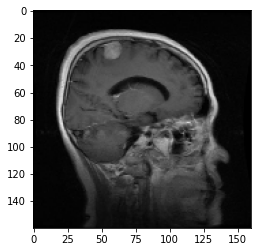

Actual Mask Image


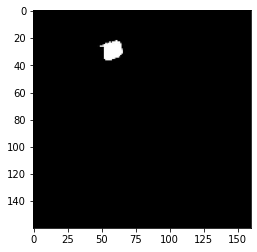

Predicted Mask Image


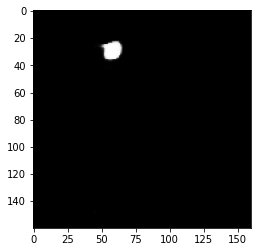

Predicted Mask Tumor


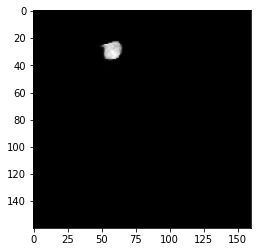

Predicted class = [0.0000000e+00 2.4677243e-17 1.0000000e+00 1.5227370e-15]
True class = 2
Actual MRI Image


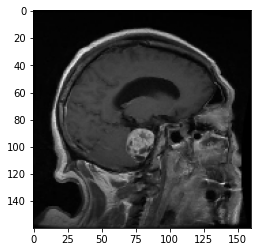

Actual Mask Image


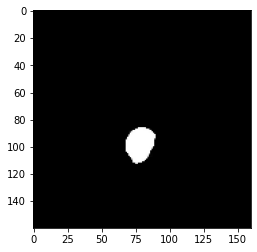

Predicted Mask Image


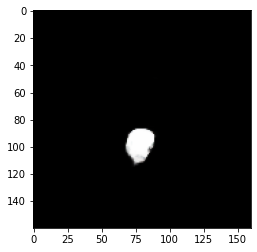

Predicted Mask Tumor


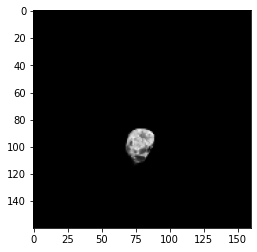

Predicted class = [1.5943697e-21 4.2661784e-05 9.9995160e-01 5.7647590e-06]
True class = 2
Actual MRI Image


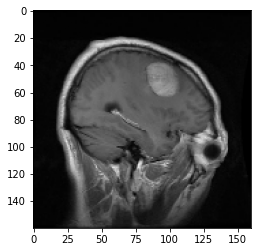

Actual Mask Image


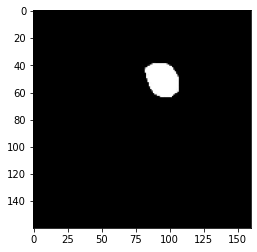

Predicted Mask Image


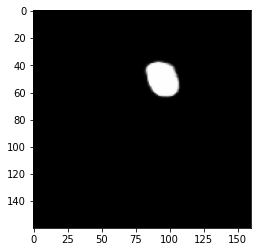

Predicted Mask Tumor


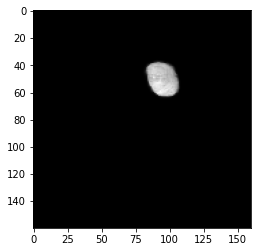

Predicted class = [0. 0. 1. 0.]
True class = 2
Actual MRI Image


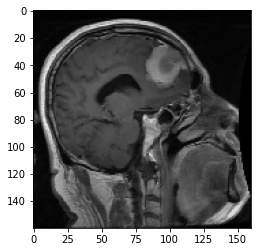

Actual Mask Image


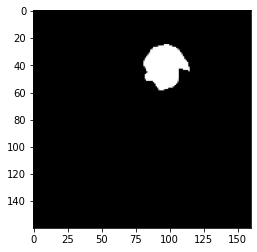

Predicted Mask Image


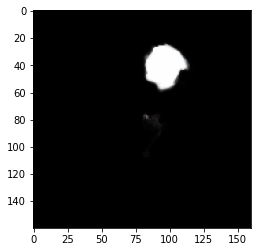

Predicted Mask Tumor


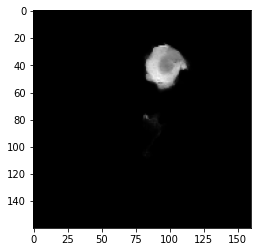

Predicted class = [0.0000000e+00 9.2047530e-28 1.0000000e+00 3.7862916e-29]
True class = 2
Actual MRI Image


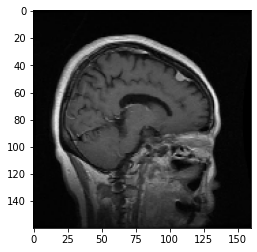

Actual Mask Image


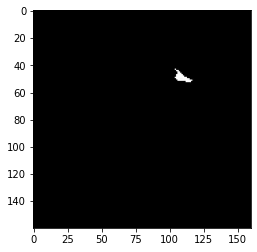

Predicted Mask Image


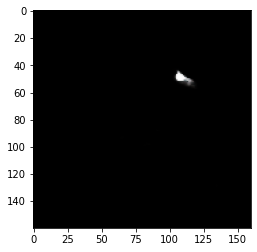

Predicted Mask Tumor


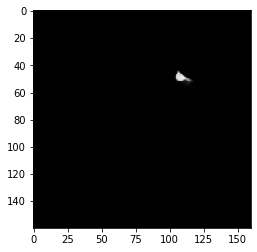

Predicted class = [2.3967069e-38 8.5506455e-09 1.0000000e+00 7.8316811e-09]
True class = 2
Actual MRI Image


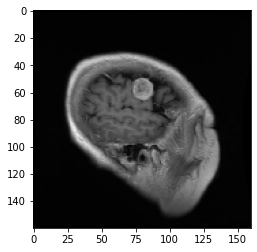

Actual Mask Image


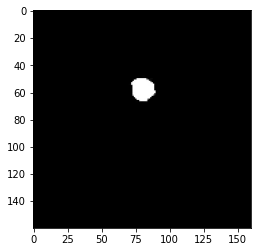

Predicted Mask Image


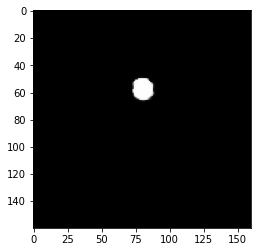

Predicted Mask Tumor


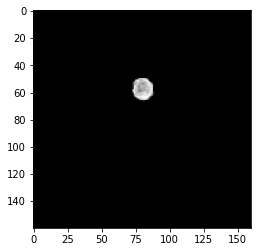

Predicted class = [6.5849124e-19 3.8628964e-04 9.9939203e-01 2.2172541e-04]
True class = 2
Actual MRI Image


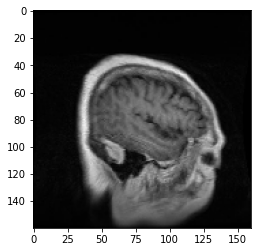

Actual Mask Image


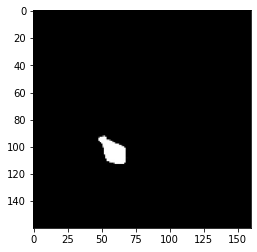

Predicted Mask Image


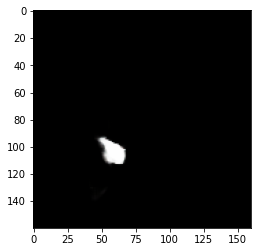

Predicted Mask Tumor


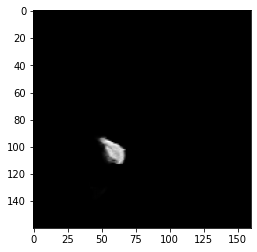

Predicted class = [5.8896777e-28 6.0159488e-07 9.9999928e-01 1.5392436e-07]
True class = 2
Actual MRI Image


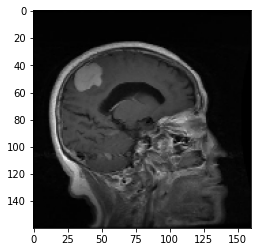

Actual Mask Image


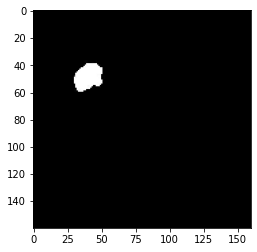

Predicted Mask Image


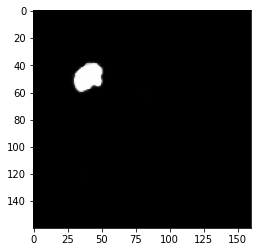

Predicted Mask Tumor


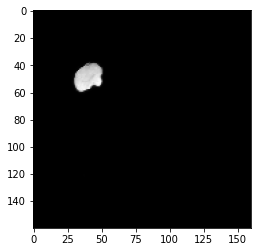

Predicted class = [0. 0. 1. 0.]
True class = 2
Actual MRI Image


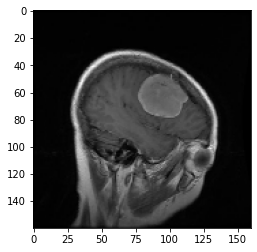

Actual Mask Image


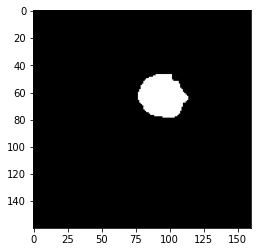

Predicted Mask Image


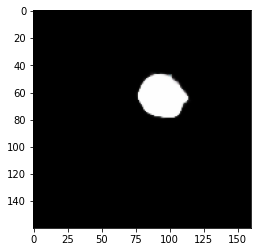

Predicted Mask Tumor


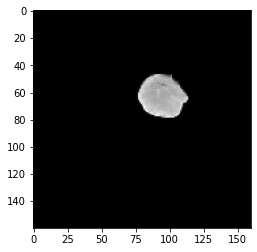

Predicted class = [0.0000000e+00 8.0094052e-29 1.0000000e+00 2.8233374e-27]
True class = 2
Actual MRI Image


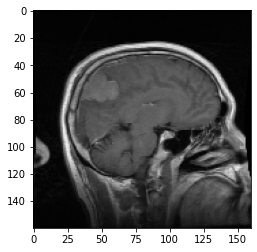

Actual Mask Image


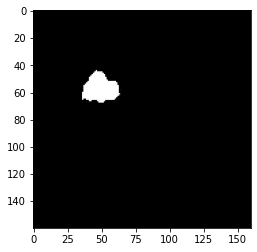

Predicted Mask Image


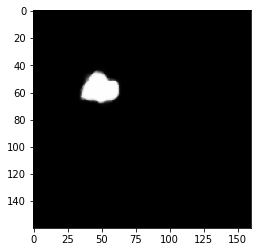

Predicted Mask Tumor


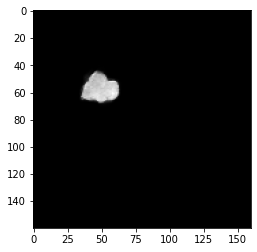

Predicted class = [0.0000000e+00 2.9590336e-13 1.0000000e+00 3.0001317e-14]
True class = 2
Actual MRI Image


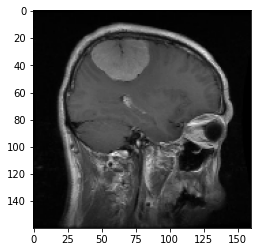

Actual Mask Image


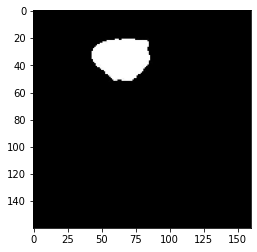

Predicted Mask Image


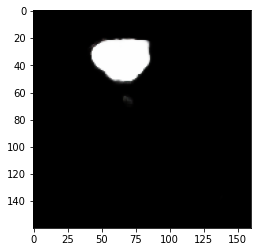

Predicted Mask Tumor


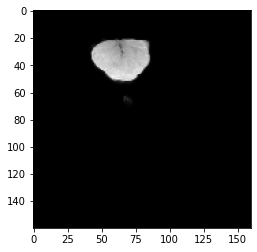

Predicted class = [0. 0. 1. 0.]
True class = 2
Actual MRI Image


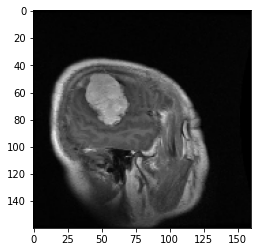

Actual Mask Image


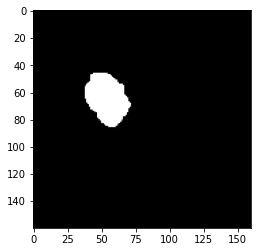

Predicted Mask Image


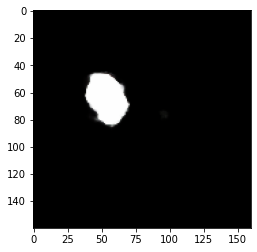

Predicted Mask Tumor


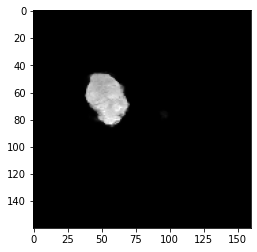

Predicted class = [0.0000000e+00 0.0000000e+00 1.0000000e+00 5.9310983e-36]
True class = 2
Actual MRI Image


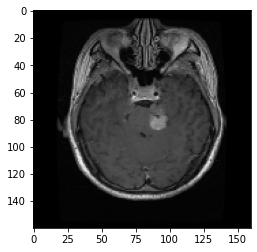

Actual Mask Image


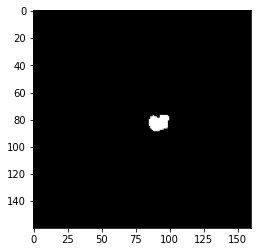

Predicted Mask Image


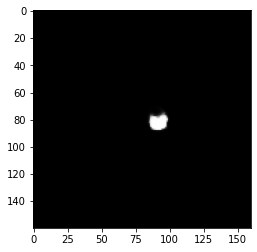

Predicted Mask Tumor


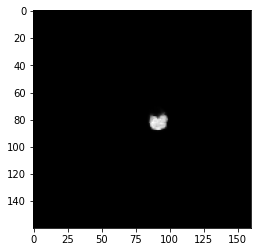

Predicted class = [4.41834367e-23 1.12627866e-04 9.99864340e-01 2.29870329e-05]
True class = 2
Actual MRI Image


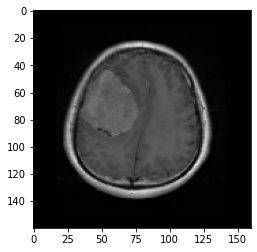

Actual Mask Image


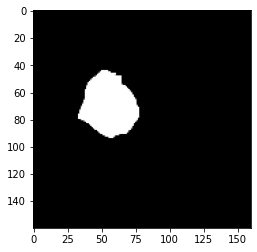

Predicted Mask Image


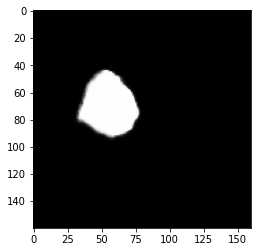

Predicted Mask Tumor


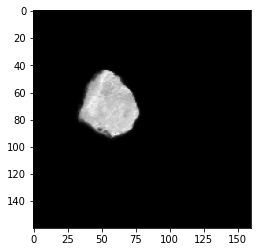

Predicted class = [0.0000000e+00 8.7921909e-12 1.0000000e+00 1.1757042e-11]
True class = 2


In [ ]:
for i in range(0,604,10):
  print('Actual MRI Image')
  plt.imshow(raw_img[i])
  plt.show()
  print('Actual Mask Image')
  plt.imshow(mask_img[i])
  plt.show()
  print('Predicted Mask Image')
  plt.imshow(y_pred[i])
  plt.show()
  print('Predicted Mask Tumor')
  plt.imshow(tumimg[i],cmap='gray')
  plt.show()
  print('Predicted class = '+str(class_pred[i]))
  print('True class = '+str(y[i]))

In [ ]:
smooth=1.

def dice_coef(y_true, y_pred):
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    intersection = K.sum(y_true * y_pred)
    union = K.sum(y_true) + K.sum(y_pred)
    return (2.0 * intersection + smooth) / (union + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

def bce_dice_loss(y_true, y_pred):
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    return dice_coef_loss(y_true, y_pred) + bce(y_true, y_pred)

def iou(y_true, y_pred):
    intersection = K.sum(y_true * y_pred)
    sum_ = K.sum(y_true + y_pred)
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    return jac

In [ ]:
print(dice_coef(mask_img, y_pred))
print(dice_coef_loss(mask_img, y_pred))
print(bce_dice_loss(mask_img, y_pred))
print(iou(mask_img, y_pred))

tf.Tensor(0.86302906, shape=(), dtype=float32)
tf.Tensor(0.13697094, shape=(), dtype=float32)
tf.Tensor(0.82731634, shape=(), dtype=float32)
tf.Tensor(0.75906074, shape=(), dtype=float32)
